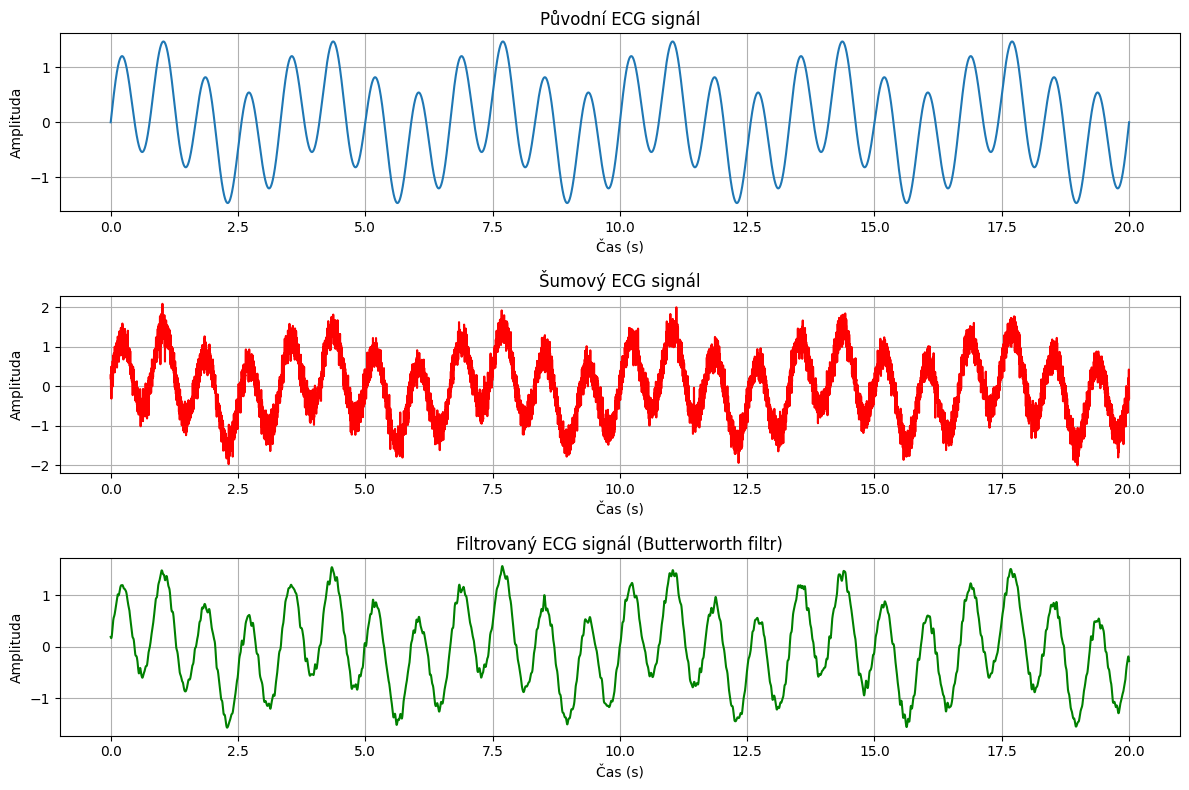

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parametry signálu
fs = 500  # Vzorkovací frekvence (Hz)
duration = 20  # Délka signálu (vteřiny)
t = np.linspace(0, duration, duration * fs)  # Časová osa

# Generování syntetického ECG signálu
ecg_signal = np.sin(2 * np.pi * 1.2 * t) + 0.5 * np.sin(2 * np.pi * 0.3 * t)

# Přidání šumu (Gaussův šum)
noise = np.random.normal(0, 0.2, len(t))
noisy_ecg = ecg_signal + noise

# Návrh Butterworth filtru
cutoff = 20  # Mezní frekvence (Hz)
order = 4    # Řád filtru
nyquist = 0.5 * fs  # Nyquistova frekvence
normal_cutoff = cutoff / nyquist  # Normalizovaná mezní frekvence
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Aplikace filtru na šumový signál
filtered_signal = filtfilt(b, a, noisy_ecg)

# Vykreslení výsledků
plt.figure(figsize=(12, 8))

# Původní signál
plt.subplot(3, 1, 1)
plt.plot(t, ecg_signal, label="Original ECG Signal")
plt.title("Původní ECG signál")
plt.xlabel("Čas (s)")
plt.ylabel("Amplituda")
plt.grid()

# Šumový signál
plt.subplot(3, 1, 2)
plt.plot(t, noisy_ecg, label="Noisy ECG Signal", color='r')
plt.title("Šumový ECG signál")
plt.xlabel("Čas (s)")
plt.ylabel("Amplituda")
plt.grid()

# Filtrovaný signál
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label="Filtered ECG Signal", color='g')
plt.title("Filtrovaný ECG signál (Butterworth filtr)")
plt.xlabel("Čas (s)")
plt.ylabel("Amplituda")
plt.grid()

plt.tight_layout()
plt.show()


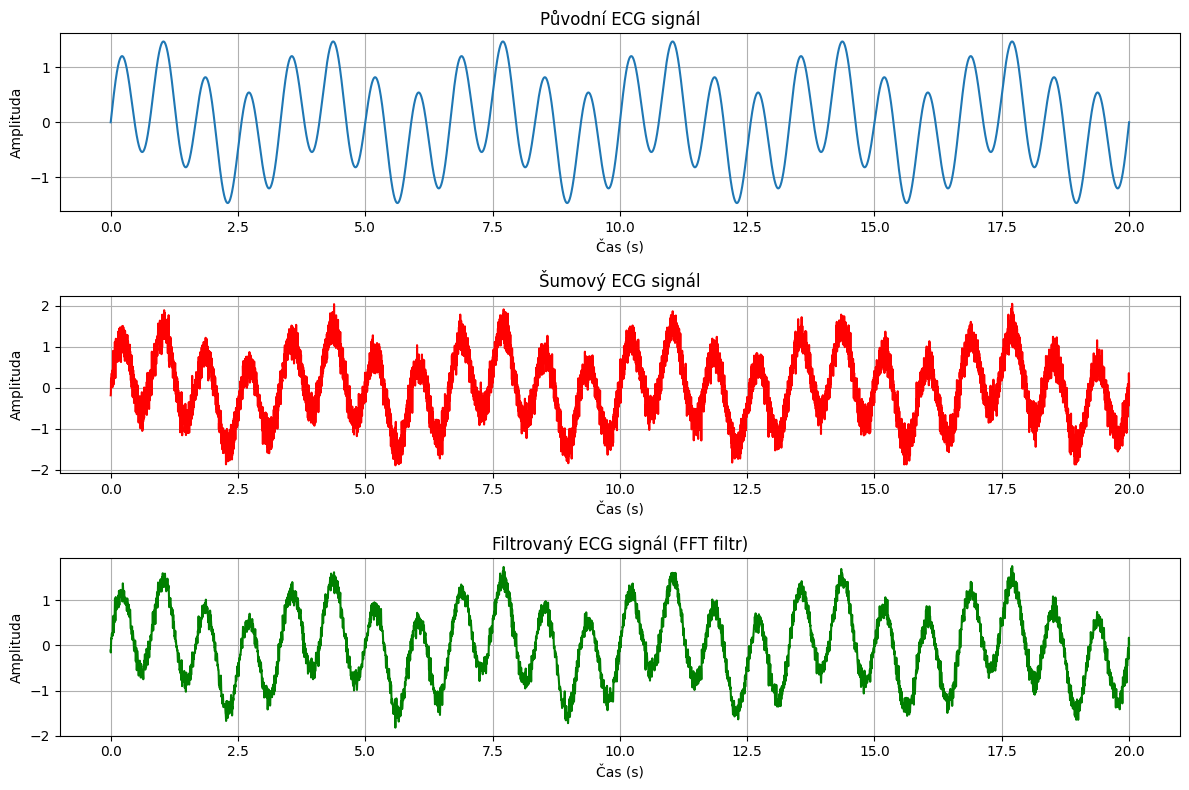

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry signálu
fs = 500  # Vzorkovací frekvence (Hz)
duration = 20  # Délka signálu (vteřiny)
t = np.linspace(0, duration, duration * fs)  # Časová osa

# Generování syntetického ECG signálu
ecg_signal = np.sin(2 * np.pi * 1.2 * t) + 0.5 * np.sin(2 * np.pi * 0.3 * t)

# Přidání šumu (Gaussův šum)
noise = np.random.normal(0, 0.2, len(t))
noisy_ecg = ecg_signal + noise

# FFT šumového signálu
freqs = np.fft.fftfreq(len(noisy_ecg), 1/fs)
fft_noisy_ecg = np.fft.fft(noisy_ecg)

# Vytvoření nízkofrekvenčního filtru ve frekvenční doméně
cutoff = 80  # Mezní frekvence (Hz) 
fft_filter = np.zeros_like(freqs)
fft_filter[np.abs(freqs) <= cutoff] = 1  # Propustí jen frekvence <= 50 Hz

# Aplikace filtru
filtered_fft = fft_noisy_ecg * fft_filter

# Rekonstrukce signálu z filtrované frekvenční domény
filtered_signal = np.fft.ifft(filtered_fft).real

# Vykreslení výsledků
plt.figure(figsize=(12, 8))

# Původní signál
plt.subplot(3, 1, 1)
plt.plot(t, ecg_signal, label="Original ECG Signal")
plt.title("Původní ECG signál")
plt.xlabel("Čas (s)")
plt.ylabel("Amplituda")
plt.grid()

# Šumový signál
plt.subplot(3, 1, 2)
plt.plot(t, noisy_ecg, label="Noisy ECG Signal", color='r')
plt.title("Šumový ECG signál")
plt.xlabel("Čas (s)")
plt.ylabel("Amplituda")
plt.grid()

# Filtrovaný signál
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label="Filtered ECG Signal", color='g')
plt.title("Filtrovaný ECG signál (FFT filtr)")
plt.xlabel("Čas (s)")
plt.ylabel("Amplituda")
plt.grid()

plt.tight_layout()
plt.show()
